### Text Classification Using PySpark and LogisticRegression

In [153]:
#### Importing and creating the session
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("TextClassifierwithPySpark").getOrCreate()

In [154]:
#load the Dataset
df=spark.read.csv("data/udemy_courses_clean.csv",header=True,inferSchema=True)

In [155]:
df.show()

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

In [156]:
df.columns

['_c0',
 'course_id',
 'course_title',
 'url',
 'is_paid',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'level',
 'content_duration',
 'published_timestamp',
 'subject',
 'clean_course_title']

In [157]:
df.select('course_title','subject').show()

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
|Trading Penny Sto...|Business Finance|
|Investing And Tra...|Business Finance|
|Trading Stock Cha...|Business Finance|
|Options Trading 3...|Business Finance|
|The Only Investme...|Business Finance|
|Forex Trading Sec...|Business Finance|
|Trading Options W...|Business Finance|
|Financial Managem...|Business Finance|
|Forex Trading Cou...|Business Finance|
|Python Algo Tradi...|Business Finance|
|Short Selling: Le...|Business Finance|
|Basic Technical A...|Business Finance|
|The Complete Char...|Business Finance|
|7 Deadly Mistakes...|Business Finance|
|Financial Stateme...|Business Finance|
+--------------------+----------------+
only showing top 20 rows



In [158]:
df=df.select('course_title','subject')

In [159]:
#value count
df.groupby('subject').count().show()

+--------------------+-----+
|             subject|count|
+--------------------+-----+
|play Electric Gui...|    1|
|Multiply returns ...|    1|
|                null|    6|
|    Business Finance| 1198|
|Introduction Guit...|    1|
|Learn Play Fernan...|    1|
|      Graphic Design|  603|
|Aprende tocar el ...|    1|
|     Web Development| 1200|
|Learn Classical G...|    1|
| Musical Instruments|  676|
+--------------------+-----+



In [160]:
#check for missing values
df.toPandas()['subject'].isnull().sum()

6

In [161]:
#drop missing values
df=df.dropna(subset=('subject'))

In [162]:
#check for missing values
df.toPandas()['subject'].isnull().sum()

0

In [163]:
df.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



### Feature Extraction (Build feature from the test by using one of these:)
+ CountVectorizer
+ TFIDF
+ WordEmbeding
+ HashingTF



In [165]:
import pyspark.ml.feature

In [167]:
#some of them can help us for feature extraction of the text
dir(pyspark.ml.feature)

['Any',
 'Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'DataFrame',
 'DenseMatrix',
 'DenseVector',
 'Dict',
 'ElementwiseProduct',
 'FeatureHasher',
 'Generic',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JM',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'List',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'Optional',
 'P',
 'PCA',
 'PCAModel',
 'Param',
 '

In [168]:
#importing required packages
from pyspark.ml.feature import Tokenizer,StopWordsRemover, CountVectorizer, IDF
from pyspark.ml.feature import StringIndexer

In [169]:
df.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



In [170]:
#Stages for the Pipeline

tokenizer=Tokenizer(inputCol="course_title",outputCol="mytokens")
stopwords_remover=StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer=CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf=IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')

In [171]:
type(stopwords_remover)

pyspark.ml.feature.StopWordsRemover

In [172]:
#LabelEncoding/LabelIndexing 
labelEncoder=StringIndexer(inputCol='subject',outputCol='label').fit(df)

In [173]:
labelEncoder.transform(df).show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [174]:
labelEncoder.labels

['Web Development',
 'Business Finance',
 'Musical Instruments',
 'Graphic Design',
 'Aprende tocar el Acorden de odo con tcnicahttpswwwudemycomaprendeatocarelacordeondeoidoycontecnicatrue25932134Beginner Level4 hours20140916T195145Z 263432Aprende los Secretos de la Armnica con HARPSOUL',
 'Introduction Guitar A Course Beginnershttpswwwudemycomintroductiontoguitartrue251631156Beginner Level25 hours20141030T155939Z 650804Guitar Master Class Learning Play Guitar Z',
 'Learn Classical Guitar Technique play Spanish Romancehttpswwwudemycomguitartechniquestrue19513164643All Levels5 hours20131118T175959Z 265888Learn Guitar Worship Learn 4 Songs unlock 1',
 'Learn Play Fernando Sors Study B minorhttpswwwudemycomstudyinbminortrue115140359Intermediate Level43 mins20140127T205816Z 398746Piano Chord Based System  Learn Play Pros Do',
 'Multiply returns Value Investinghttpswwwudemycommultiplyyourreturnsusingvalueinvestingtrue2019421963All Levels45 hours20150723T000833Z 874284Weekly Forex Analysis B

In [185]:
#Dictionary of labels
label_dict={
'Web Development':0.0,
 'Business Finance':1.0,
 'Musical Instruments':2.0,
 'Graphic Design':3.0
}

In [186]:
df.show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [187]:
df=labelEncoder.transform(df)

IllegalArgumentException: requirement failed: Output column label already exists.

In [188]:
df.show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [189]:
#Splitting the dataset
(trainDF,testDF)=df.randomSplit((0.7,0.3),seed=42)

In [190]:
trainDF.show()

+--------------------+--------------------+-----+
|        course_title|             subject|label|
+--------------------+--------------------+-----+
|#1 Piano Hand Coo...| Musical Instruments|  2.0|
|#10 Hand Coordina...| Musical Instruments|  2.0|
|#4 Piano Hand Coo...| Musical Instruments|  2.0|
|#5  Piano Hand Co...| Musical Instruments|  2.0|
|#6 Piano Hand Coo...| Musical Instruments|  2.0|
|'Geometry Of Chan...|    Business Finance|  1.0|
|              000!""|Learn Classical G...|  6.0|
|1 - Concepts of S...|    Business Finance|  1.0|
|          1 Hour CSS|     Web Development|  0.0|
|1. Principles of ...|    Business Finance|  1.0|
|10 Numbers Every ...|    Business Finance|  1.0|
|10.  Bonds and Bo...|    Business Finance|  1.0|
|101 Blues riffs -...| Musical Instruments|  2.0|
|15 Mandamientos p...|    Business Finance|  1.0|
|17 Complete JavaS...|     Web Development|  0.0|
|188% Profit in 1Y...|    Business Finance|  1.0|
|2 Easy Steps To I...|    Business Finance|  1.0|


In [192]:
from pyspark.ml.classification import LogisticRegression
lr=LogisticRegression(featuresCol='vectorizedFeatures', labelCol='label')

In [193]:
###Building the Pipeline
from pyspark.ml import Pipeline

In [195]:
pipeline=Pipeline(stages=[tokenizer, stopwords_remover,vectorizer,idf,lr])

In [196]:
pipeline.stages

Param(parent='Pipeline_b47ae23ebacb', name='stages', doc='a list of pipeline stages')

In [198]:
#Building Model
lr_model=pipeline.fit(trainDF)
lr_model

PipelineModel_177b6f64ab07

In [199]:
#Predictions on our Test Dataset

In [200]:
predictions=lr_model.transform(testDF)

In [202]:
# predictions.show()

In [203]:
#select columns
predictions.columns

['course_title',
 'subject',
 'label',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [204]:
predictions.select('rawPrediction','probability','subject','label','prediction').show(10)

DataFrame[rawPrediction: vector, probability: vector, prediction: double]

### Model Evaluation
+ Accuracy
+ Precision
+ F1score



In [79]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [218]:
evaluator=MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction',metricName='accuracy')

In [219]:
accuracy=evaluator.evaluate(predictions)
accuracy

0.9173003802281369

### Confusion Matrix
+ Covert to pandas
+ sklearn

In [223]:
y_true=predictions.select('label')
y_true=y_true.toPandas()
y_pred=predictions.select('prediction')
y_pred=y_pred.toPandas()

In [228]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_true,y_pred)
cm

array([[321,  10,   1,   4,   0,   0],
       [  9, 340,   1,   1,   0,   0],
       [  6,  15, 156,   1,   0,   0],
       [  8,  23,   6, 148,   0,   0],
       [  0,   1,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0]], dtype=int64)

In [231]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 

In [237]:
label_dict.keys()

dict_keys(['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design'])

In [244]:
class_names=['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design','N4','N5']

Confusion matrix, without normalization
[[321  10   1   4   0   0]
 [  9 340   1   1   0   0]
 [  6  15 156   1   0   0]
 [  8  23   6 148   0   0]
 [  0   1   0   0   0   0]
 [  0   1   0   0   0   0]]


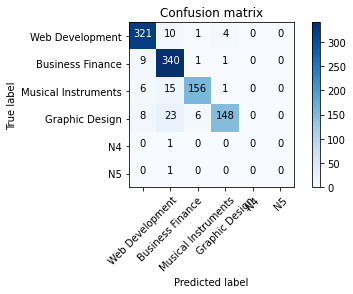

In [245]:
plot_confusion_matrix(cm, class_names)

In [246]:
#Classification Report
print(classification_report(y_true,y_pred,target_names=class_names))

                     precision    recall  f1-score   support

    Web Development       0.93      0.96      0.94       336
   Business Finance       0.87      0.97      0.92       351
Musical Instruments       0.95      0.88      0.91       178
     Graphic Design       0.96      0.80      0.87       185
                 N4       0.00      0.00      0.00         1
                 N5       0.00      0.00      0.00         1

           accuracy                           0.92      1052
          macro avg       0.62      0.60      0.61      1052
       weighted avg       0.92      0.92      0.92      1052



C:\Users\Soha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Soha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Soha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Making a single Prediction
+ sample as DF
+ apply pipeline

In [255]:
from pyspark.sql.types import StringType

In [260]:
ex1=spark.createDataFrame([
    ("Building Machine Learning Apps with Python and Pyspark", StringType())
],
#Column Name
    ["course_title"]
)

In [261]:
# Predict
pred_ex1=lr_model.transform(ex1)

In [264]:
pred_ex1.columns

['course_title',
 '_2',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [268]:
pred_ex1.select('course_title','rawPrediction','probability','prediction')

DataFrame[course_title: string, rawPrediction: vector, probability: vector, prediction: double]

In [269]:
label_dict

{'Web Development': 0.0,
 'Business Finance': 1.0,
 'Musical Instruments': 2.0,
 'Graphic Design': 3.0}

In [273]:
### Save the Model
modelPath="pyspark_lr_model"
lr_model.save(modelPath)

Py4JJavaError: An error occurred while calling o2237.save.
: java.io.IOException: Path pyspark_lr_model already exists. To overwrite it, please use write.overwrite().save(path) for Scala and use write().overwrite().save(path) for Java and Python.
	at org.apache.spark.ml.util.FileSystemOverwrite.handleOverwrite(ReadWrite.scala:683)
	at org.apache.spark.ml.util.MLWriter.save(ReadWrite.scala:167)
	at org.apache.spark.ml.PipelineModel$PipelineModelWriter.super$save(Pipeline.scala:344)
	at org.apache.spark.ml.PipelineModel$PipelineModelWriter.$anonfun$save$4(Pipeline.scala:344)
	at org.apache.spark.ml.MLEvents.withSaveInstanceEvent(events.scala:174)
	at org.apache.spark.ml.MLEvents.withSaveInstanceEvent$(events.scala:169)
	at org.apache.spark.ml.util.Instrumentation.withSaveInstanceEvent(Instrumentation.scala:42)
	at org.apache.spark.ml.PipelineModel$PipelineModelWriter.$anonfun$save$3(Pipeline.scala:344)
	at org.apache.spark.ml.PipelineModel$PipelineModelWriter.$anonfun$save$3$adapted(Pipeline.scala:344)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.PipelineModel$PipelineModelWriter.save(Pipeline.scala:344)
	at java.base/jdk.internal.reflect.DirectMethodHandleAccessor.invoke(DirectMethodHandleAccessor.java:104)
	at java.base/java.lang.reflect.Method.invoke(Method.java:578)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1589)


In [274]:
#Loading pickled model 
from pyspark.ml.pipeline import PipelineModel
persistedModel=PipelineModel.load(modelPath)

Py4JJavaError: An error occurred while calling o2244.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/C:/Users/Soha/Desktop/Spark/pyspark_lr_model/metadata
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:292)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:292)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:288)
	at org.apache.spark.api.java.JavaRDDLike.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.JavaRDDLike.partitions$(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at java.base/jdk.internal.reflect.DirectMethodHandleAccessor.invoke(DirectMethodHandleAccessor.java:104)
	at java.base/java.lang.reflect.Method.invoke(Method.java:578)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1589)
Caused by: java.io.IOException: Input path does not exist: file:/C:/Users/Soha/Desktop/Spark/pyspark_lr_model/metadata
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 23 more
